In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)


In [ ]:
plt.style.use('default')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%%time
df = pd.read_csv('/content/drive/MyDrive/2. Cup_IT_2022_Датасет_Data_Science.csv')
y = df['is_in_club'] # label
for column in df:
    y = y[(df[column]>=0) + (df[column].isna())]
    df = df[(df[column]>=0) + (df[column].isna())]

CPU times: user 8.72 s, sys: 393 ms, total: 9.12 s
Wall time: 11.2 s


In [ ]:
df

,client_id,is_in_club,cnt_checks_10_Мясная гастрономия,rto_std_11,rto_6,rto_12_Сыры,rto_12_Птица и изделия из птицы,rto_8,cnt_checks_9,rto_9_Мясная гастрономия,...,rto_stddev_12_Сыры,rto_6_Крупы и зерновые,rto_stddev_7_Рыба и рыбные изделия,rto_stddev_8_Овощи - Фрукты,rto_8_Рыба и рыбные изделия,rto_11_Сыры,cnt_checks_8_Сыры,cnt_checks_8,rto_stddev_9_Мясная гастрономия,rto_stddev_12_Крупы и зерновые
0,0,0,NaN,300.021342,2418.116714,853.016746,NaN,5092.170392,3.0,NaN,...,73.846425,148.316558,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN
1,1,0,1.0,519.031384,19899.211736,NaN,NaN,32392.636661,7.0,NaN,...,NaN,NaN,225.219998,301.404157,525.868862,1153.293331,7.0,21.0,NaN,NaN
2,2,0,NaN,131.165948,411.347689,NaN,NaN,1416.656061,NaN,NaN,...,NaN,NaN,NaN,6.651813,NaN,NaN,NaN,5.0,NaN,NaN
3,3,0,2.0,NaN,35043.643030,NaN,NaN,8460.544337,7.0,1425.707450,...,NaN,NaN,NaN,NaN,743.245025,NaN,NaN,4.0,104.784828,NaN
5,5,0,7.0,857.167292,11933.515863,1373.399681,1054.092634,10303.841003,11.0,2512.226929,...,69.455478,NaN,NaN,58.166161,529.238757,2143.918194,5.0,9.0,52.899882,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135055,135055,0,1.0,74.119831,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135056,135056,0,NaN,196.068192,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,97.138634,NaN,NaN,NaN,NaN
135058,135058,0,NaN,512.741089,NaN,283.611949,NaN,NaN,2.0,NaN,...,2.670624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135059,135059,0,NaN,124.425093,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Расскоментить для предобработки данных (и чтобы взять без тестовой части)

In [ ]:
# %%time
# df.drop(columns=['client_id', 'is_in_club'], inplace=True)

# X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)

# missing = {}
# for i in range(df.shape[1]):
#     percent = np.around((X_train.isnull().sum(axis=0)[i] * 100) / X_train.shape[0], decimals=1)
#     missing[X_train.columns.values[i]] = percent
# missing = pd.DataFrame(missing, index=[0])
# X = missing.T

# X.rename(columns={0:"%"}, inplace=True)
# X['bin'] = np.floor_divide(missing.T, 10)

# columns_to_delete = X[X['bin'] >= 7].index.values
# X_train.drop(columns=columns_to_delete, inplace=True)
# %%time
# for column in X_train:
#     y_train = y_train[(X_train[column]>=0) + (X_train[column].isna())]
#     X_train = X_train[(X_train[column]>=0) + (X_train[column].isna())]

# X_train['is_in_club'] = y_train

# df = X_train # Чтобы не менять названия переменных ниже

### Выделим категории товаров

In [ ]:
cats = set()
for col in df.columns:
    if 'rto_std' in col:
        cat = col.split('_')[-1]
        if not cat.isdigit():
            cats.add(cat)
cats = list(cats)   
cats

['Сыры',
 'Овощи - Фрукты',
 'Крупы и зерновые',
 'Мясная гастрономия',
 'Рыба и рыбные изделия',
 'Птица и изделия из птицы']

### Доля клиентов в клубе

In [ ]:
in_club_percent = round(df.is_in_club.sum() / df.shape[0] * 100, 1) #  Доля пользователей, состоящих в клубе
in_club_percent

9.0

### Средние чеки в клубе и вне клуба

In [ ]:
# средний чек в месяц
for n in range(6,13): 
    df[f'mean_check_{n}'] = df[f'rto_{n}'] / df[f'cnt_checks_{n}']


In [ ]:
cols = [f'mean_check_{n}' for n in range(6, 13)]

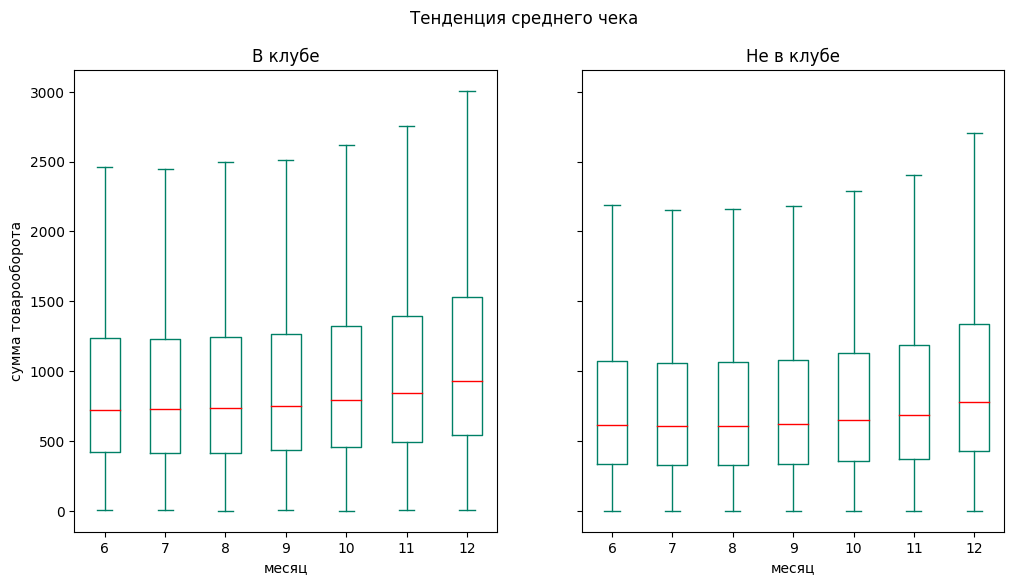

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
fig.suptitle('Тенденция среднего чека')
for f in range(2):
    df[df.is_in_club == 1 - f][cols].plot(kind='box', showfliers=False, ax=axs[f], cmap='summer', color={'medians': 'red'}, ylabel='сумма товарооборота')
    axs[f].set_xticklabels(np.arange(6, 13))
    axs[f].set_xlabel('месяц')
    axs[f].set_title('В клубе' if (1-f) else 'Не в клубе')

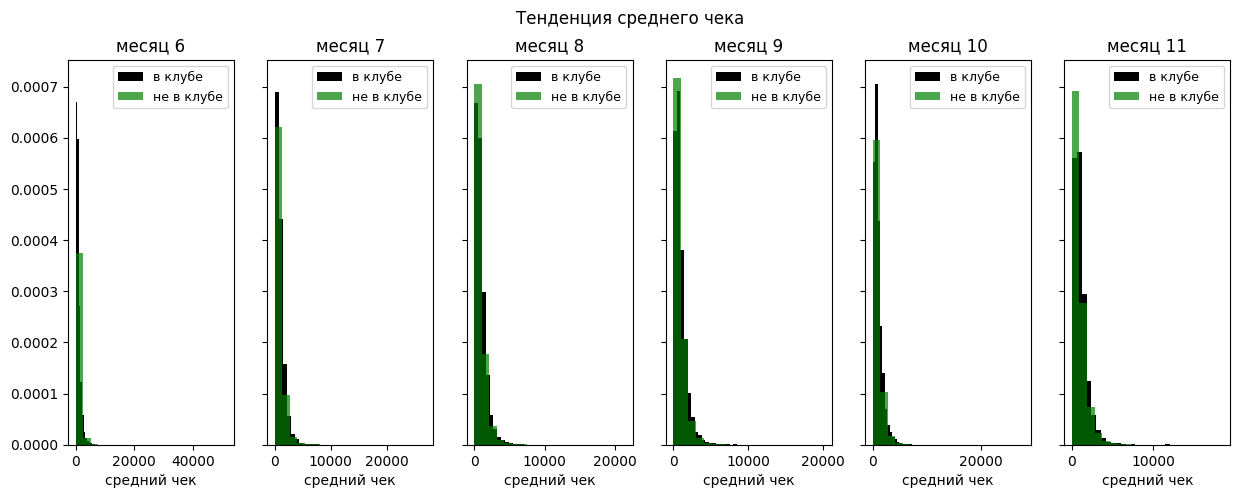

In [ ]:
fig, axs = plt.subplots(1, 6, figsize=(15, 5), sharey=True)
fig.suptitle('Тенденция среднего чека')
for f in range(6):
    axs[f].hist(df[df.is_in_club == 1][cols[f]], bins=20, density=True, color='black', stacked=True, label='в клубе')
    axs[f].hist(df[df.is_in_club == 0][cols[f]], bins=20, density=True, color='green', alpha=0.7, stacked=True, label='не в клубе')
    axs[f].set_xlabel('средний чек')
    axs[f].legend(prop={'size': 9})
    axs[f].set_title(f'месяц {f + 6}')

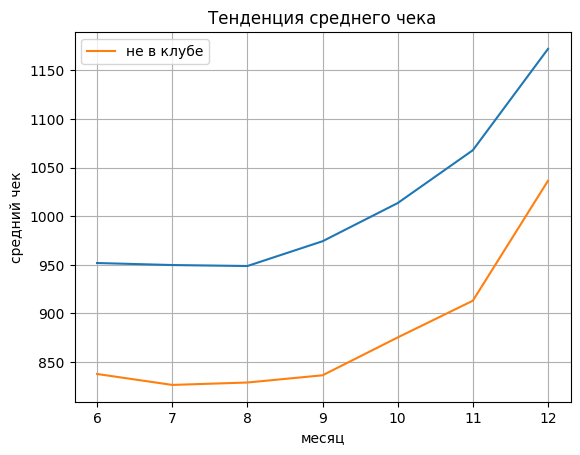

In [ ]:
plt.plot(np.arange(6,13), [df[df.is_in_club == 1][f'mean_check_{n}'].mean() for n in range(6,13)],)# label='в клубе')
plt.plot(np.arange(6,13), [df[df.is_in_club == 0][f'mean_check_{n}'].mean() for n in range(6,13)], label='не в клубе')
plt.legend()
plt.xlabel('месяц')
plt.ylabel('средний чек')
plt.grid(True)
plt.title('Тенденция среднего чека')
plt.show()

In [ ]:
in_out_comparrison_value = pd.DataFrame(index=np.arange(6,13),
                                  columns=['mean_in_club', 'mean_out_club', 'std_in_club', 'std_out_club'],
                                  data=[[df[df.is_in_club == 1][f'mean_check_{n}'].mean(),
                                         df[df.is_in_club == 0][f'mean_check_{n}'].mean(),
                                         df[df.is_in_club == 1][f'mean_check_{n}'].std(),
                                         df[df.is_in_club == 0][f'mean_check_{n}'].std()
                                        ] for n in range(6, 13)]
                                  )
in_out_comparrison_value = in_out_comparrison_value.style.set_caption('Среднее значение и отклонение средних чеков в месяц')
in_out_comparrison_value = in_out_comparrison_value.format('{:.1f}')
in_out_comparrison_value

,mean_in_club,mean_out_club,std_in_club,std_out_club
6,951.9,837.7,816.5,821.4
7,949.8,826.5,823.1,790.8
8,948.8,829.0,794.4,795.8
9,974.3,836.4,815.8,777.9
10,1013.5,875.3,818.9,813.7
11,1067.9,913.1,863.8,833.3
12,1172.1,1036.5,951.7,962.4


### Стабильность суммы чеков

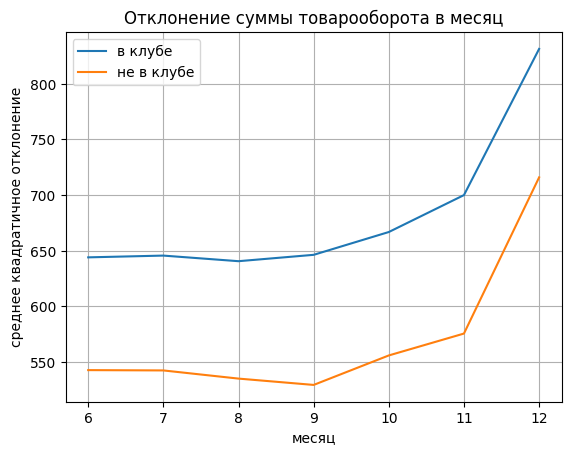

In [ ]:
plt.plot(np.arange(6,13), [df[df.is_in_club == 1][f'rto_std_{n}'].mean() for n in range(6,13)], label='в клубе')
plt.plot(np.arange(6,13), [df[df.is_in_club == 0][f'rto_std_{n}'].mean() for n in range(6,13)], label='не в клубе')
plt.legend()
plt.xlabel('месяц')
plt.ylabel('среднее квадратичное отклонение')
plt.grid(True)
plt.title('Отклонение суммы товарооборота в месяц')
plt.show()

# Значения отклонения, которые даны в датасете расходятся с непосредственно посчитанными по другим колонкам

In [ ]:
in_out_comparrison_std = pd.DataFrame(index=np.arange(6,13),
                                  columns=['std_in_club', 'std_out_club'],
                                  data=[[
                                         df[df.is_in_club == 1][f'rto_std_{n}'].std(),
                                         df[df.is_in_club == 0][f'rto_std_{n}'].std()
                                        ] for n in range(6, 13)]
                                  )
in_out_comparrison_std = in_out_comparrison_std.style.set_caption('Стандартное отклонение суммы товарооборота от чека к чеку в месяц,')
in_out_comparrison_std = in_out_comparrison_std.format('{:.1f}')
in_out_comparrison_std

,std_in_club,std_out_club
6,571.8,562.4
7,574.0,555.1
8,554.1,548.5
9,556.9,534.5
10,561.9,558.7
11,562.3,574.8
12,745.5,777.3


### Частота покупок в клубе и вне клуба

In [ ]:
cols_cnt_checks = [f'cnt_checks_{n}' for n in range(6, 13)]

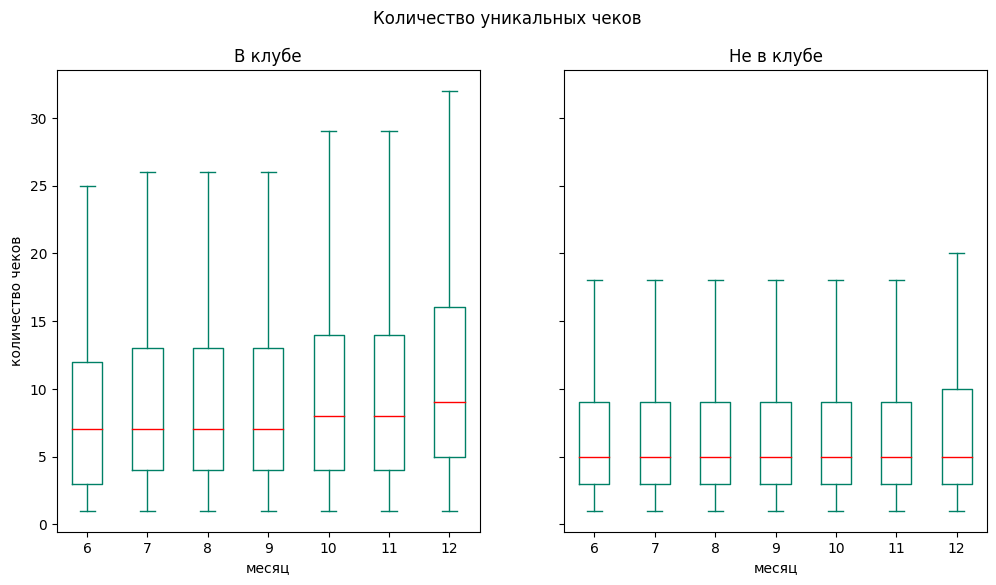

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
fig.suptitle('Количество уникальных чеков')
for f in range(2):
    df[df.is_in_club == 1 - f][cols_cnt_checks].plot(kind='box', showfliers=False, ax=axs[f], cmap='summer', color={'medians': 'red'}, ylabel='количество чеков')
    axs[f].set_xticklabels(np.arange(6, 13))
    axs[f].set_xlabel('месяц')
    axs[f].set_title('В клубе' if (1-f) else 'Не в клубе')

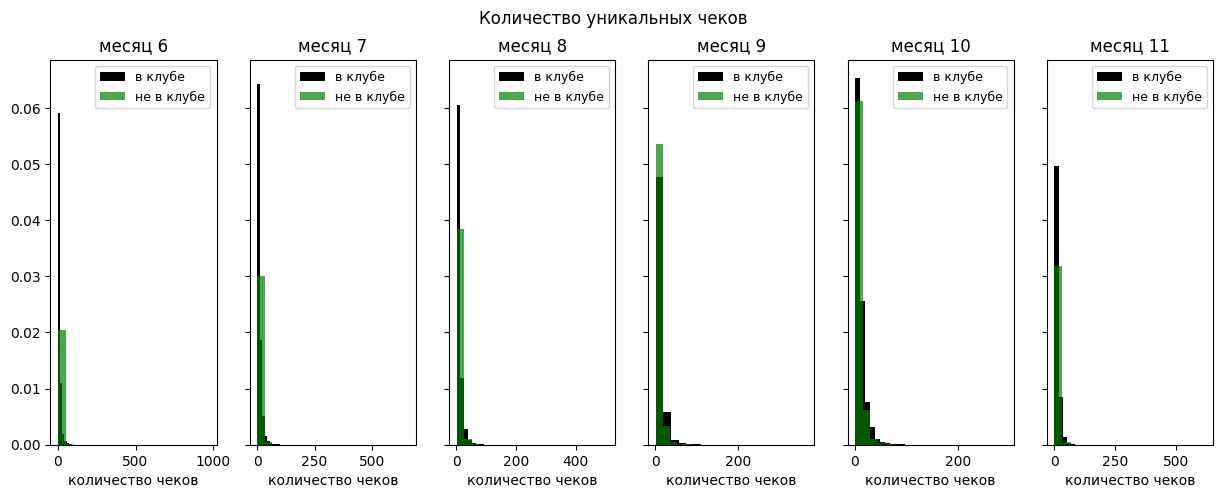

In [ ]:
fig, axs = plt.subplots(1, 6, figsize=(15, 5), sharey=True)
fig.suptitle('Количество уникальных чеков')
for f in range(6):
    axs[f].hist(df[df.is_in_club == 1][cols_cnt_checks[f]], bins=20, density=True, color='black', stacked=True, label='в клубе')
    axs[f].hist(df[df.is_in_club == 0][cols_cnt_checks[f]], bins=20, density=True, color='green', alpha=0.7, stacked=True, label='не в клубе')
    axs[f].set_xlabel('количество чеков')
    axs[f].legend(prop={'size': 9})
    axs[f].set_title(f'месяц {f + 6}')

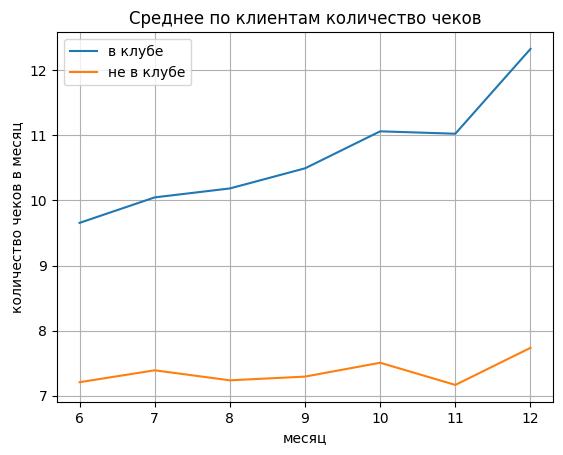

In [ ]:
plt.plot(np.arange(6,13), [df[df.is_in_club == 1][f'cnt_checks_{n}'].mean() for n in range(6,13)], label='в клубе')
plt.plot(np.arange(6,13), [df[df.is_in_club == 0][f'cnt_checks_{n}'].mean() for n in range(6,13)], label='не в клубе')
plt.legend()
plt.xlabel('месяц')
plt.ylabel('количество чеков в месяц')
plt.grid(True)
plt.title('Среднее по клиентам количество чеков')
plt.show()

In [ ]:
in_out_comparrison_amount = pd.DataFrame(index=np.arange(6,13),
                                  columns=['mean_in_club', 'mean_out_club', 'std_in_club', 'std_out_club'],
                                  data=[[np.round(df[df.is_in_club == 1][f'cnt_checks_{n}'].mean(), 1),
                                         np.round(df[df.is_in_club == 0][f'cnt_checks_{n}'].mean(), 1),
                                         np.round(df[df.is_in_club == 1][f'cnt_checks_{n}'].std(), 1),
                                         np.round(df[df.is_in_club == 0][f'cnt_checks_{n}'].std(), 1)
                                        ] for n in range(6, 13)]
                                  )
in_out_comparrison_amount = in_out_comparrison_amount.style.set_caption('Среднее значение и отклонение количества чеков в месяц')
in_out_comparrison_amount = in_out_comparrison_amount.format('{:.1f}')
in_out_comparrison_amount

,mean_in_club,mean_out_club,std_in_club,std_out_club
6,9.7,7.2,10.2,8.3
7,10.0,7.4,10.6,8.4
8,10.2,7.2,11.2,8.2
9,10.5,7.3,11.8,7.9
10,11.1,7.5,11.2,7.9
11,11.0,7.2,11.0,7.7
12,12.3,7.7,12.0,8.6


### Динамика среднего чека и количества чеков

In [ ]:
in_rto_max = max([df[df.is_in_club == 1][f'rto_{n}'].mean() for n in range(6,13)])
in_rto_min = min([df[df.is_in_club == 1][f'rto_{n}'].mean() for n in range(6,13)])
out_rto_max = max([df[df.is_in_club == 0][f'rto_{n}'].mean() for n in range(6,13)])
out_rto_min = min([df[df.is_in_club == 0][f'rto_{n}'].mean() for n in range(6,13)])

growth_rto_in = np.round((in_rto_max - in_rto_min) / in_rto_min * 100, 1)
growth_rto_out = np.round((out_rto_max - out_rto_min) / out_rto_min * 100, 1)


in_cnt_checks_max = max([df[df.is_in_club == 1][f'cnt_checks_{n}'].mean() for n in range(6,13)])
in_cnt_checks_min = min([df[df.is_in_club == 1][f'cnt_checks_{n}'].mean() for n in range(6,13)])
out_cnt_checks_max = max([df[df.is_in_club == 0][f'cnt_checks_{n}'].mean() for n in range(6,13)])
out_cnt_checks_min = min([df[df.is_in_club == 0][f'cnt_checks_{n}'].mean() for n in range(6,13)])

growth_cnt_checks_in = np.round((in_cnt_checks_max - in_cnt_checks_min) / in_cnt_checks_min * 100, 1)
growth_cnt_checks_out = np.round((out_cnt_checks_max - out_cnt_checks_min) / out_cnt_checks_min * 100, 1)


print(f'Рост среднего чека за 6 месяцев после вступления в клуб - {growth_rto_in}%, для простых держателей карты - {growth_rto_out}%', )
print(f'Рост количества чеков за 6 месяцев после вступления в клуб - {growth_cnt_checks_in}%, для простых держателей карты - {growth_cnt_checks_out}%', )

Рост среднего чека за 6 месяцев после вступления в клуб - 53.9%, для простых держателей карты - 36.8%
Рост количества чеков за 6 месяцев после вступления в клуб - 27.7%, для простых держателей карты - 7.9%


### Рейтинг категорий в клубе и вне клуба (по сумме товарооборота)

In [ ]:
cols_cat_rto = [[f'rto_{n}_{cat}' for n in range(6, 13)] for cat in cats]

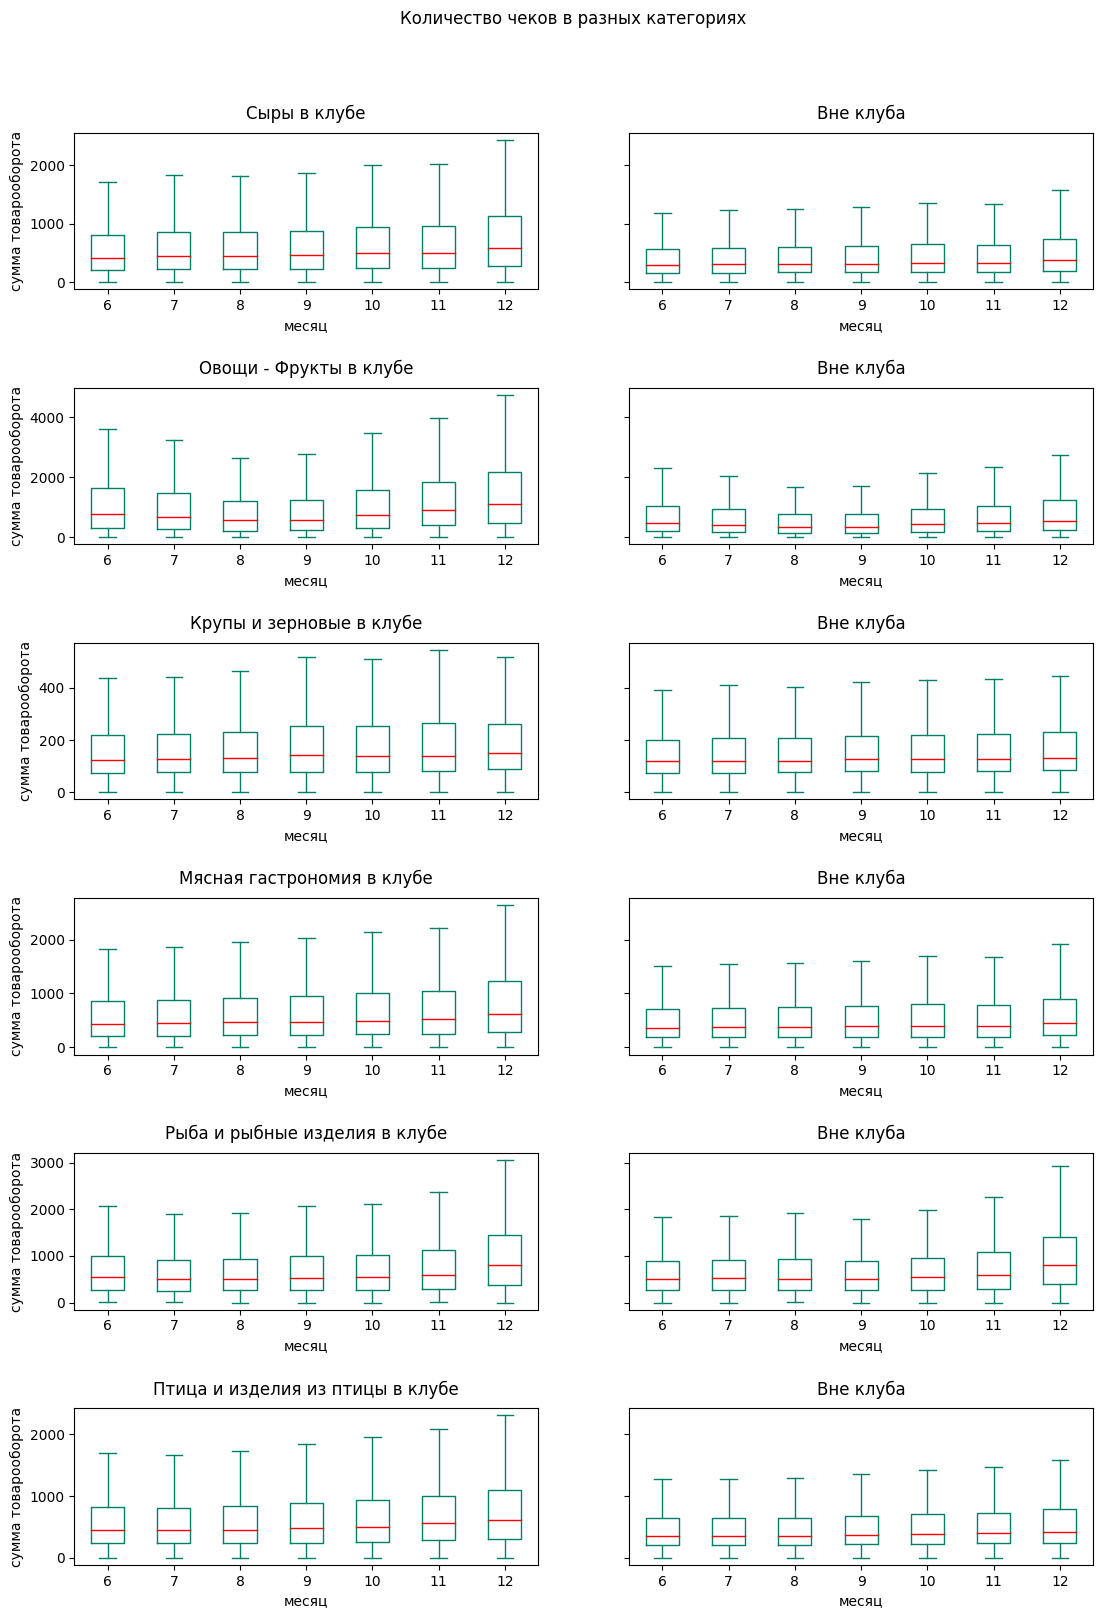

In [ ]:
fig, axs = plt.subplots(len(cats), 2, figsize=(12,16), sharey='row')

fig.suptitle('Количество чеков в разных категориях', y=1.03)
fig.tight_layout(pad=5)
for n in range(len(cats)):
    for f in range(2):
        df[df.is_in_club == 1 - f][cols_cat_rto[n]].plot(kind='box', showfliers=False, ax=axs[n, f], cmap='summer', color={'medians': 'red'}, ylabel='сумма товарооборота',)
        axs[n, f].set_xticklabels(np.arange(6, 13))
        axs[n, f].set_title(cats[n] + ' в клубе' if (1-f) else 'Вне клуба', pad=10)
        axs[n, f].set_xlabel('месяц')


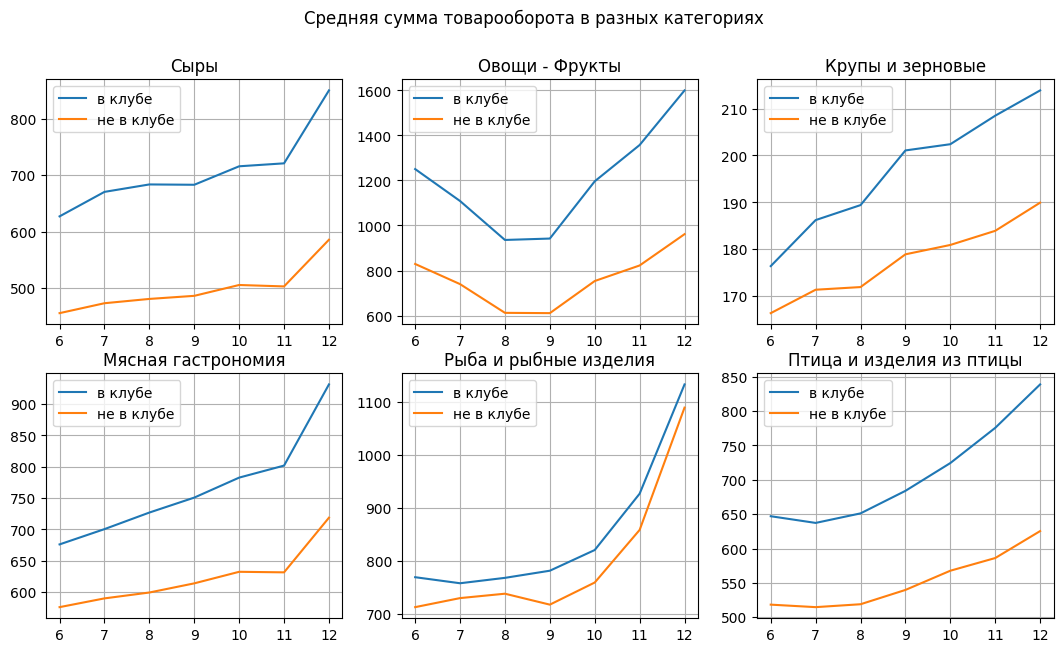

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(13, 7))
fig.suptitle('Средняя сумма товарооборота в разных категориях')
k = -1
for i in range(2):
    for j in range(3):
        k += 1
        axs[i, j].plot(np.arange(6,13), [df[df.is_in_club == 1][f'rto_{n}_{cats[k]}'].mean() for n in range(6,13)], label='в клубе')
        axs[i, j].plot(np.arange(6,13), [df[df.is_in_club == 0][f'rto_{n}_{cats[k]}'].mean() for n in range(6,13)], label='не в клубе')
        axs[i,j].set_title(f'{cats[k]}')
        axs[i, j].grid(True)
        axs[i, j].legend()
        

In [ ]:
# средняя за весь период сумма товарооборота в месяц в определённой категории
for cat in cats:
    for n in range(6,13): 
        try:
            df[f'mean_rto_{cat}'] += df[f'rto_{n}_{cat}'] / 7
        except KeyError:
            df[f'mean_rto_{cat}'] = df[f'rto_{n}_{cat}'] / 7

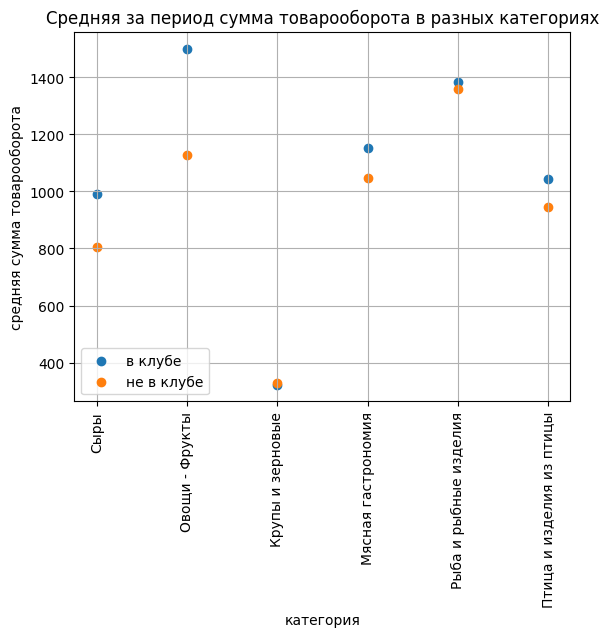

In [ ]:
plt.scatter(cats, [df[df.is_in_club == 1][f'mean_rto_{cat}'].mean() for cat in cats], label='в клубе')
plt.scatter(cats, [df[df.is_in_club == 0][f'mean_rto_{cat}'].mean() for cat in cats], label='не в клубе')
plt.legend()
plt.xlabel('категория')
plt.ylabel('средняя сумма товарооборота')
plt.grid(True)
plt.title('Средняя за период сумма товарооборота в разных категориях')
plt.xticks(rotation=90)
plt.show()


In [ ]:
cats_new = cats[:2]+cats[4:]

In [ ]:
cats_new

['Сыры', 'Овощи - Фрукты', 'Рыба и рыбные изделия', 'Птица и изделия из птицы']

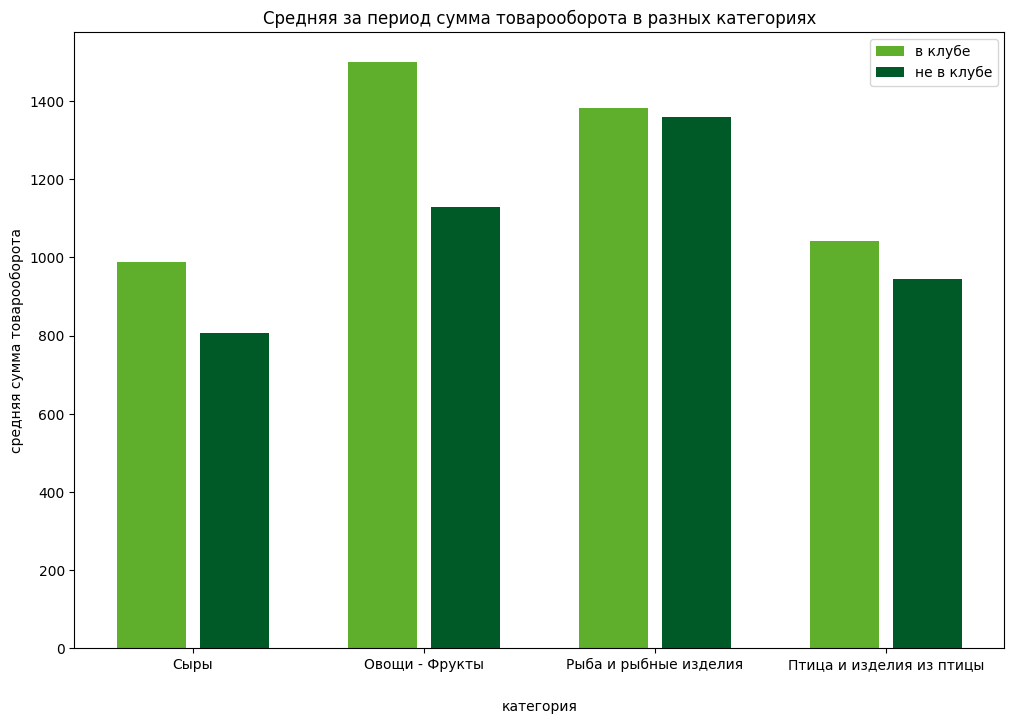

In [ ]:
X_axis  = np.arange(len(cats_new))
plt.figure(figsize=(12,8))
plt.bar(X_axis - 0.18, [df[df.is_in_club == 1][f'mean_rto_{cat}'].mean() for cat in cats_new], 0.3, label='в клубе', color='#5faf2d')
plt.bar(X_axis + 0.18, [df[df.is_in_club == 0][f'mean_rto_{cat}'].mean() for cat in cats_new], 0.3, label='не в клубе', color='#005a28')
plt.xticks(X_axis, cats_new)
plt.legend()
plt.xlabel('категория', labelpad=20)
plt.ylabel('средняя сумма товарооборота')
#plt.grid(True)
plt.title('Средняя за период сумма товарооборота в разных категориях')
plt.xticks(rotation=0)
plt.show()


In [ ]:
mean_rto_in = np.array([df[df.is_in_club == 1][f'mean_rto_{cat}'].mean() for cat in cats])
mean_rto_out = np.array([df[df.is_in_club == 0][f'mean_rto_{cat}'].mean() for cat in cats]) 
delta = mean_rto_in - mean_rto_out
delta_df = pd.DataFrame(columns=cats, index=['разница (in – out)', 'относительная разница, %'],
             data=[delta, np.round(delta / mean_rto_out * 100, 1)]).T
delta_df = delta_df.style.set_caption('Разница сумм товарооборотов в разных категориях')
delta_df = delta_df.format('{:.1f}')  
delta_df

,разница (in – out),"относительная разница, %"
Сыры,183.0,22.7
Овощи - Фрукты,371.8,32.9
Крупы и зерновые,-7.1,-2.1
Мясная гастрономия,102.7,9.8
Рыба и рыбные изделия,23.9,1.8
Птица и изделия из птицы,97.4,10.3


### Рейтинг категорий в клубе и вне клуба (по количеству чеков)

In [ ]:
cols_cat_checks_cnt = [[f'cnt_checks_{n}_{cat}' for n in range(6, 13)] for cat in cats]

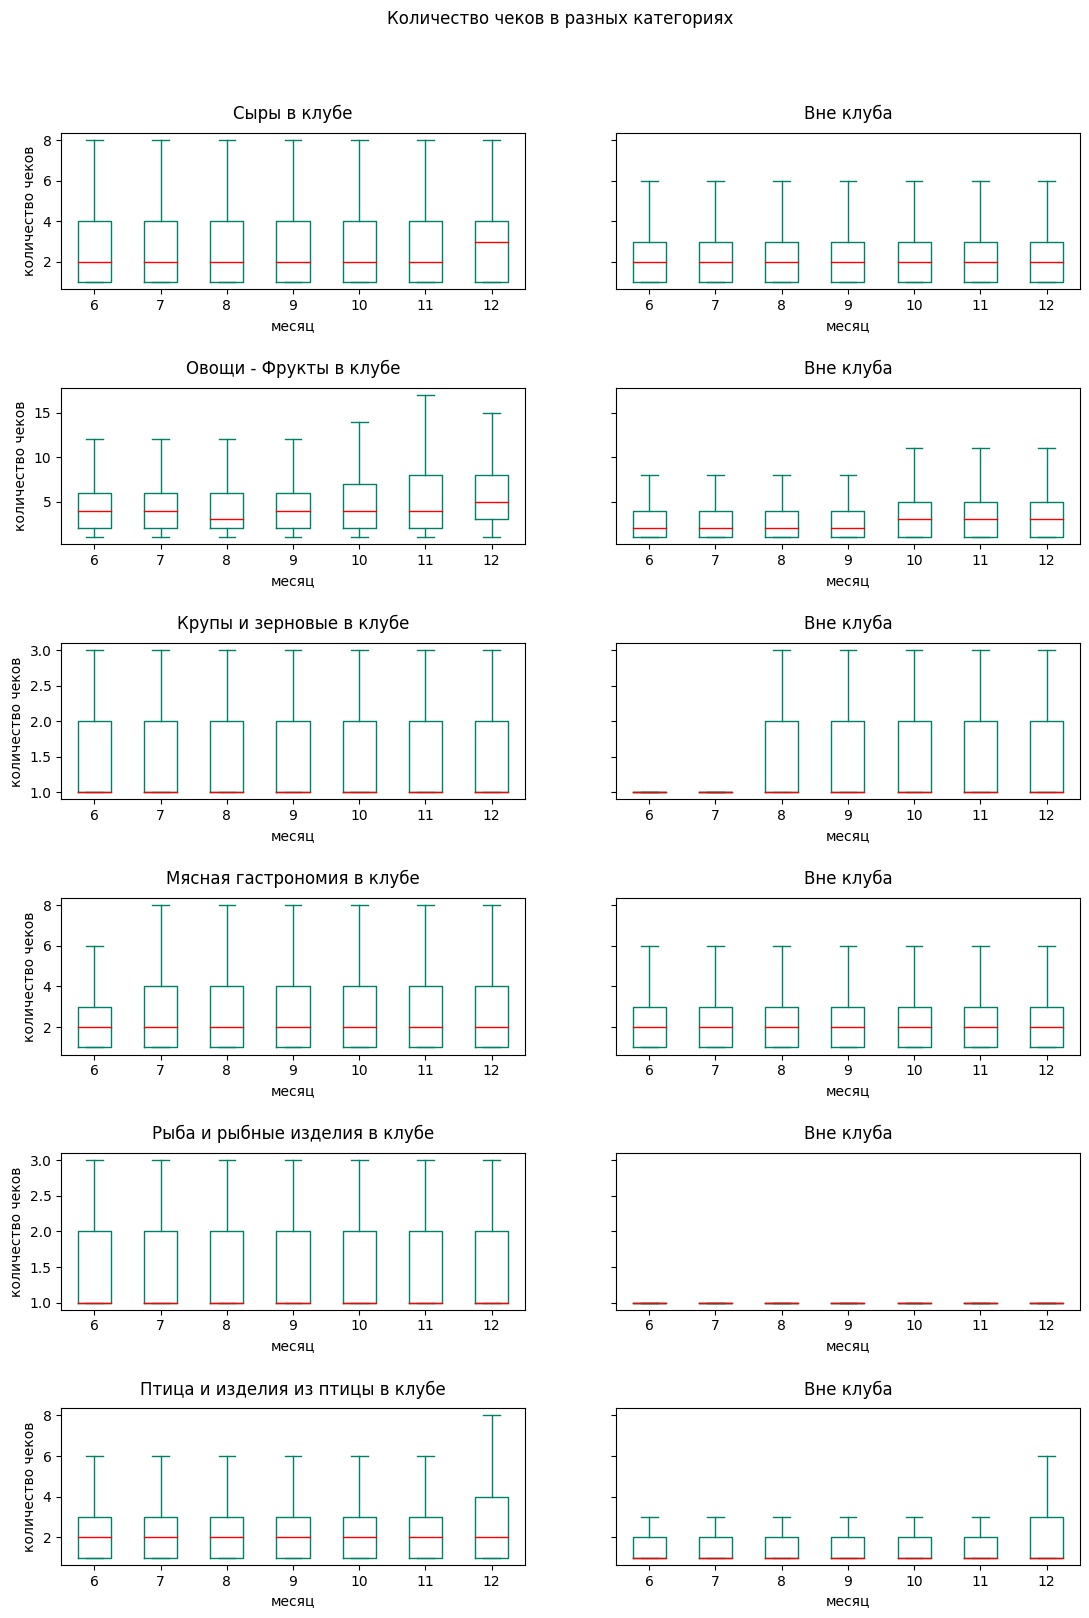

In [ ]:
fig, axs = plt.subplots(len(cats), 2, figsize=(12,16), sharey='row')

fig.suptitle('Количество чеков в разных категориях', y=1.03)
fig.tight_layout(pad=5)
for n in range(len(cats)):
    for f in range(2):
        df[df.is_in_club == 1 - f][cols_cat_checks_cnt[n]].plot(kind='box', showfliers=False, ax=axs[n, f], cmap='summer', color={'medians': 'red'}, ylabel='количество чеков',)
        axs[n, f].set_xticklabels(np.arange(6, 13))
        axs[n, f].set_title(cats[n] + ' в клубе' if (1-f) else 'Вне клуба', pad=10)
        axs[n, f].set_xlabel('месяц')


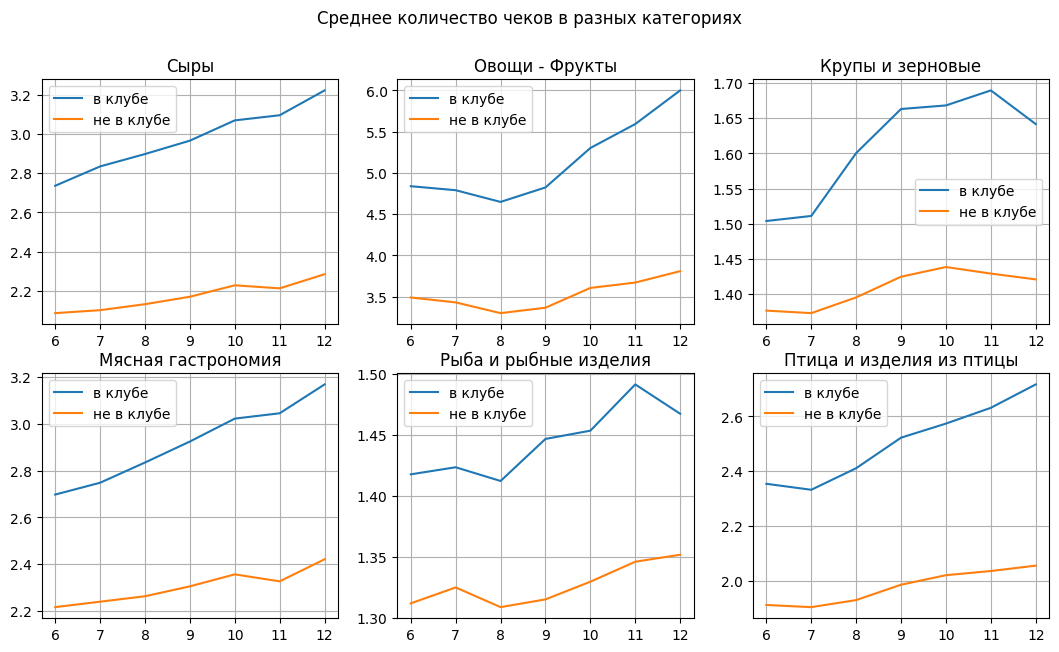

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(13, 7))
fig.suptitle('Среднее количество чеков в разных категориях')
k = -1
for i in range(2):
    for j in range(3):
        k += 1
        axs[i, j].plot(np.arange(6,13), [df[df.is_in_club == 1][f'cnt_checks_{n}_{cats[k]}'].mean() for n in range(6,13)], label='в клубе')
        axs[i, j].plot(np.arange(6,13), [df[df.is_in_club == 0][f'cnt_checks_{n}_{cats[k]}'].mean() for n in range(6,13)], label='не в клубе')
        axs[i,j].set_title(f'{cats[k]}')
        axs[i, j].grid(True)
        axs[i, j].legend()
        

In [ ]:
# среднее за весь период количество чеков в месяц в определённой категории
for cat in cats:
    for n in range(6,13): 
        try:
            df[f'mean_cnt_checks_{cat}'] += df[f'cnt_checks_{n}_{cat}'] / 7
        except KeyError:
            df[f'mean_cnt_checks_{cat}'] = df[f'cnt_checks_{n}_{cat}'] / 7

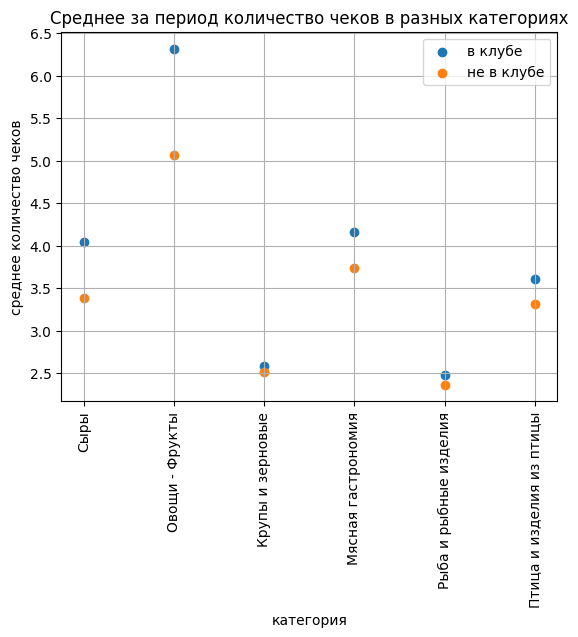

In [ ]:
plt.scatter(cats, [df[df.is_in_club == 1][f'mean_cnt_checks_{cat}'].mean() for cat in cats], label='в клубе')
plt.scatter(cats, [df[df.is_in_club == 0][f'mean_cnt_checks_{cat}'].mean() for cat in cats], label='не в клубе')
plt.legend()
plt.xlabel('категория')
plt.ylabel('среднее количество чеков')
plt.grid(True)
plt.title('Среднее за период количество чеков в разных категориях')
plt.xticks(rotation=90)
plt.show()


In [ ]:
mean_cnt_checks_in = np.array([df[df.is_in_club == 1][f'mean_cnt_checks_{cat}'].mean() for cat in cats])
mean_cnt_checks_out = np.array([df[df.is_in_club == 0][f'mean_cnt_checks_{cat}'].mean() for cat in cats]) 
delta = mean_cnt_checks_in - mean_cnt_checks_out
delta_df = pd.DataFrame(columns=cats, index=['разница (in – out)', 'относительная разница, %'],
             data=[delta, np.round(delta / mean_cnt_checks_out * 100, 1)]).T
delta_df = delta_df.style.set_caption('Разница количества чеков в разных категориях')
delta_df = delta_df.format('{:.1f}')  
delta_df

,разница (in – out),"относительная разница, %"
Сыры,0.7,19.6
Овощи - Фрукты,1.3,24.8
Крупы и зерновые,0.1,3.0
Мясная гастрономия,0.4,11.2
Рыба и рыбные изделия,0.1,4.6
Птица и изделия из птицы,0.3,8.8


### Рейтинг категорий в клубе и вне клуба (по отклонению)

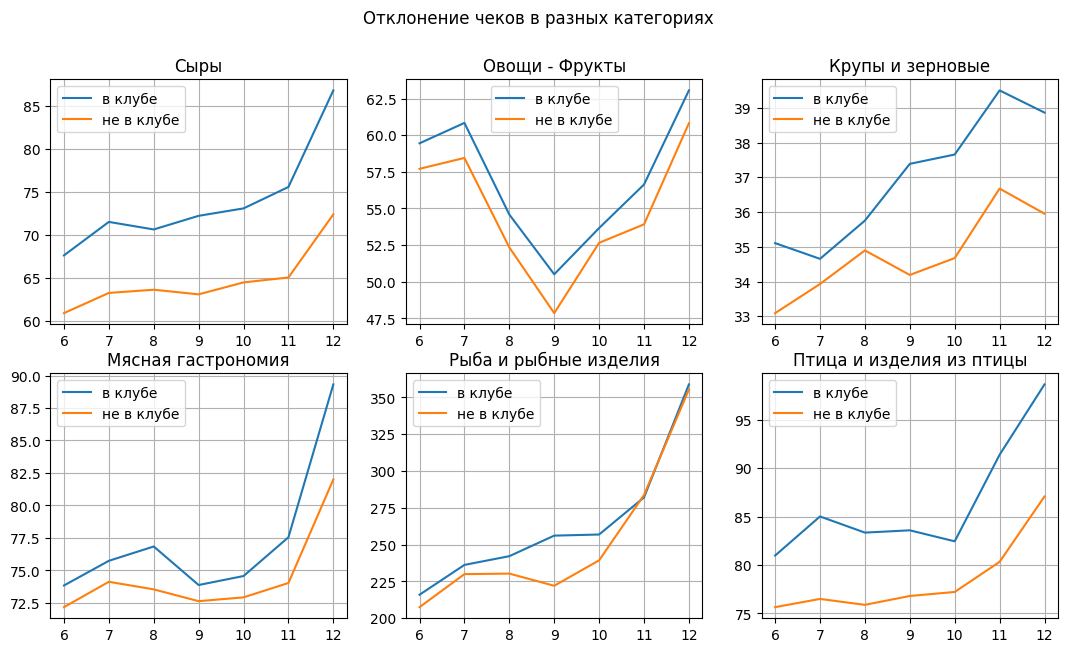

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(13, 7))
fig.suptitle('Отклонение чеков в разных категориях')
k = -1
for i in range(2):
    for j in range(3):
        k += 1
        axs[i, j].plot(np.arange(6,13), [df[df.is_in_club == 1][f'rto_stddev_{n}_{cats[k]}'].mean() for n in range(6,13)], label='в клубе')
        axs[i, j].plot(np.arange(6,13), [df[df.is_in_club == 0][f'rto_stddev_{n}_{cats[k]}'].mean() for n in range(6,13)], label='не в клубе')
        axs[i,j].set_title(f'{cats[k]}')
        axs[i, j].grid(True)
        axs[i, j].legend()
        

In [ ]:
# среднее за весь период отклонение чеков в месяц в определённой категории
for cat in cats:
    for n in range(6,13): 
        try:
            df[f'mean_rto_stddev_{cat}'] += df[f'rto_stddev_{n}_{cat}'] / 7
        except KeyError:
            df[f'mean_rto_stddev_{cat}'] = df[f'rto_stddev_{n}_{cat}'] / 7

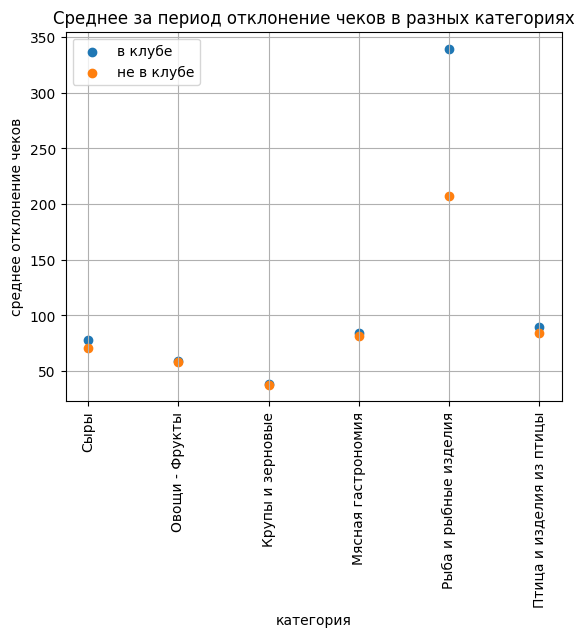

In [ ]:
plt.scatter(cats, [df[df.is_in_club == 1][f'mean_rto_stddev_{cat}'].mean() for cat in cats], label='в клубе')
plt.scatter(cats, [df[df.is_in_club == 0][f'mean_rto_stddev_{cat}'].mean() for cat in cats], label='не в клубе')
plt.legend()
plt.xlabel('категория')
plt.ylabel('среднее отклонение чеков')
plt.grid(True)
plt.title('Среднее за период отклонение чеков в разных категориях')
plt.xticks(rotation=90)
plt.show()


In [ ]:
mean_rto_stddev_in = np.array([df[df.is_in_club == 1][f'mean_rto_stddev_{cat}'].mean() for cat in cats])
mean_rto_stddev_out = np.array([df[df.is_in_club == 0][f'mean_rto_stddev_{cat}'].mean() for cat in cats]) 
delta = mean_rto_stddev_in - mean_rto_stddev_out
delta_df = pd.DataFrame(columns=cats, index=['разница (in – out)', 'относительная разница, %'],
             data=[delta, np.round(delta / mean_rto_stddev_out * 100, 1)]).T
delta_df = delta_df.style.set_caption('Разница отклонения чеков в разных категориях')
delta_df = delta_df.format('{:.1f}')  
delta_df

,разница (in – out),"относительная разница, %"
Сыры,6.7,9.5
Овощи - Фрукты,1.1,1.8
Крупы и зерновые,0.4,1.1
Мясная гастрономия,3.2,3.9
Рыба и рыбные изделия,132.7,64.1
Птица и изделия из птицы,5.4,6.3


### Отношение суммы товарооборота в данных категориях к общей сумме

In [ ]:
for cat in cats:
    for n in range(6,13):
        df[f'rto_ratio_{n}_{cat}'] = df[f'rto_{n}_{cat}'] / df[f'rto_{n}']

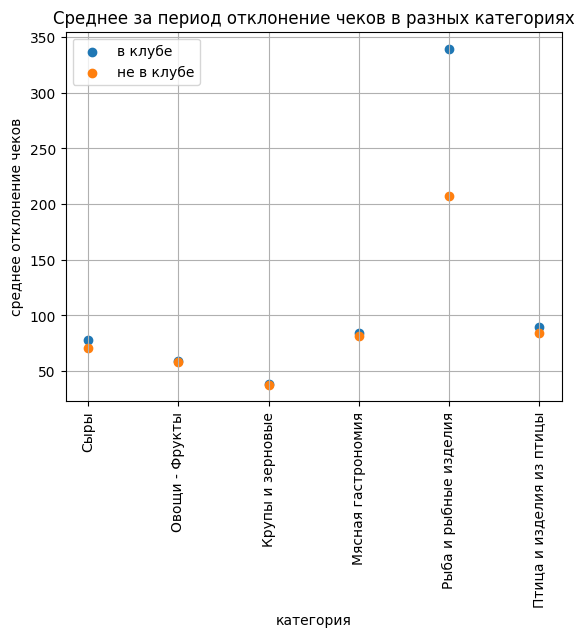

In [ ]:
plt.scatter(cats, [df[df.is_in_club == 1][f'mean_rto_stddev_{cat}'].mean() for cat in cats], label='в клубе')
plt.scatter(cats, [df[df.is_in_club == 0][f'mean_rto_stddev_{cat}'].mean() for cat in cats], label='не в клубе')
plt.legend()
plt.xlabel('категория')
plt.ylabel('среднее отклонение чеков')
plt.grid(True)
plt.title('Среднее за период отклонение чеков в разных категориях')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# отношение здорового к нездоровому
for cat in cats:
    for n in range(6,13):
        df[f'rto_ratio_pos_neg_{n}_{cat}'] = df[f'rto_{n}_{cat}'] / (df[f'rto_{n}'] - df[f'rto_{n}_{cat}'])

In [ ]:
for n in range(6,13):   
    df[f'rto_ratio_pos_neg_{n}'] = 0
    for cat in cats:   
        df[f'rto_ratio_pos_neg_{n}'] +=  df[f'rto_{n}_{cat}']
    
    df[f'rto_ratio_pos_neg_{n}'] /= (df[f'rto_{n}'] - df[f'rto_ratio_pos_neg_{n}'])


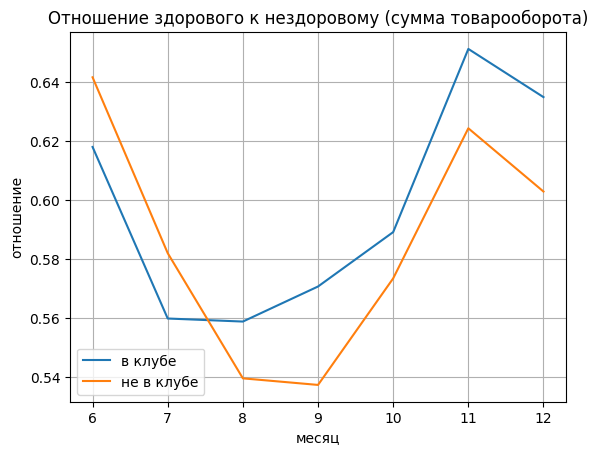

In [ ]:
plt.plot(np.arange(6,13), [df[df.is_in_club == 1][f'rto_ratio_pos_neg_{n}'].mean() for n in range(6,13)], label='в клубе')
plt.plot(np.arange(6,13), [df[df.is_in_club == 0][f'rto_ratio_pos_neg_{n}'].mean() for n in range(6,13)], label='не в клубе')
plt.legend()
plt.xlabel('месяц')
plt.ylabel('отношение')
plt.grid(True)
plt.title('Отношение здорового к нездоровому (сумма товарооборота)')
plt.show()

In [ ]:
# средняя за весь период сумма товарооборота в месяц в определённой категории
for cat in cats:
    for n in range(6,13): 
        try:
            df[f'mean_rto_ratio_{cat}'] += df[f'rto_ratio_{n}_{cat}'] / 7
        except KeyError:
            df[f'mean_rto_ratio_{cat}'] = df[f'rto_ratio_{n}_{cat}'] / 7

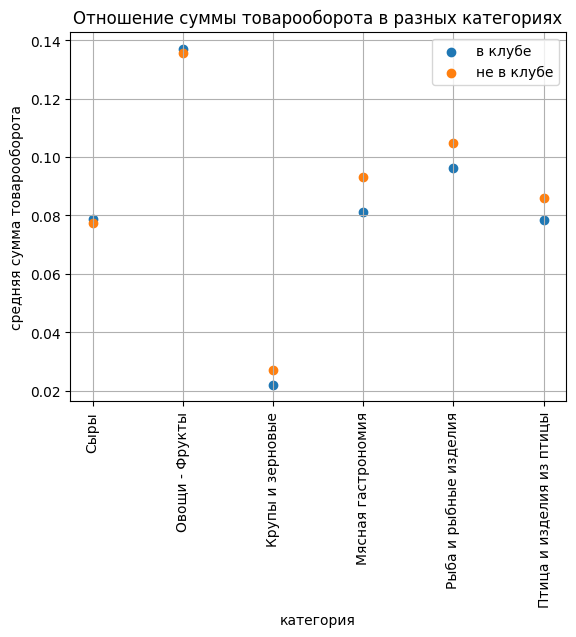

In [ ]:
plt.scatter(cats, [df[df.is_in_club == 1][f'mean_rto_ratio_{cat}'].mean() for cat in cats], label='в клубе')
plt.scatter(cats, [df[df.is_in_club == 0][f'mean_rto_ratio_{cat}'].mean() for cat in cats], label='не в клубе')
plt.legend()
plt.xlabel('категория')
plt.ylabel('средняя сумма товарооборота')
plt.grid(True)
plt.title('Отношение суммы товарооборота в разных категориях')
plt.xticks(rotation=90)
plt.show()


In [ ]:
ratio_df = pd.DataFrame(columns=cats, index=['in, %','out, %'],
             data=[[np.round(df[df.is_in_club == 1][f'mean_rto_ratio_{cat}'].mean() * 100, 1) for cat in cats],
                    [np.round(df[df.is_in_club == 0][f'mean_rto_ratio_{cat}'].mean() * 100, 1) for cat in cats]
                   ]).T 
ratio_df = ratio_df.round(2)
ratio_df = ratio_df.style.set_caption('Доля товарооборота в определённой категории')
ratio_df = ratio_df.format('{:.1f}')  
ratio_df

,"in, %","out, %"
Сыры,7.9,7.7
Овощи - Фрукты,13.7,13.5
Крупы и зерновые,2.2,2.7
Мясная гастрономия,8.1,9.3
Рыба и рыбные изделия,9.6,10.5
Птица и изделия из птицы,7.8,8.6


### Отношение количества чеков в данных категориях к общему количеству

In [ ]:
for cat in cats:
    for n in range(6,13):
        df[f'checks_cnt_ratio_{n}_{cat}'] = df[f'cnt_checks_{n}_{cat}'] / df[f'cnt_checks_{n}']

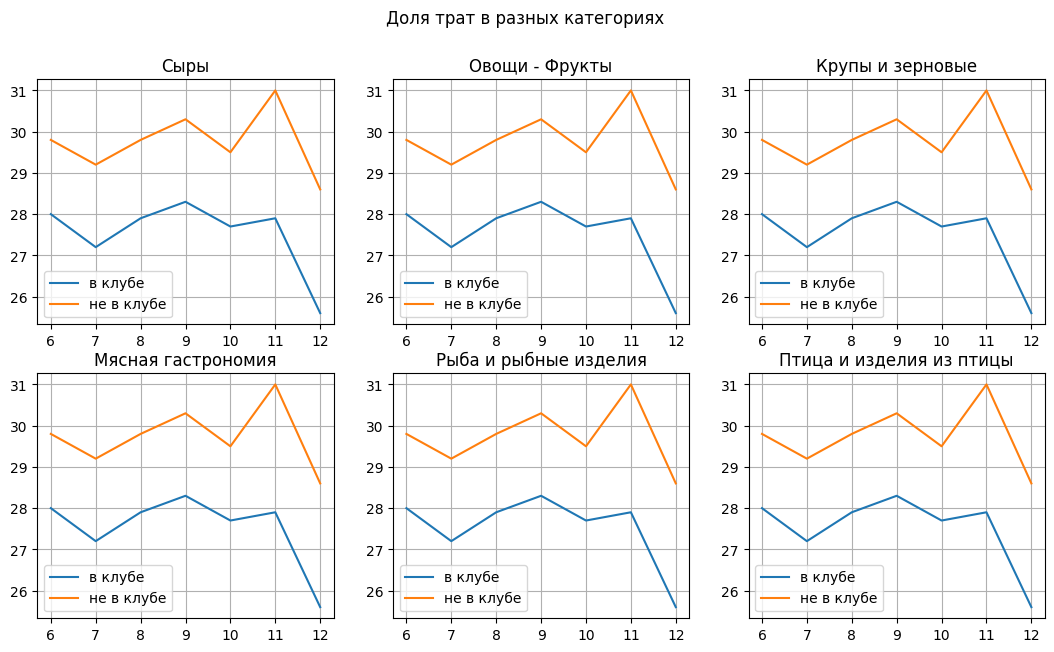

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(13, 7))
fig.suptitle('Доля трат в разных категориях')
k = -1
for i in range(2):
    for j in range(3):
        k += 1
        axs[i, j].plot(np.arange(6,13),
                       [round(df[df.is_in_club == 1][f'checks_cnt_ratio_{n}_{cat}'].mean() * 100, 1)  for n in range(6,13)],
                       label='в клубе')
        axs[i, j].plot(np.arange(6,13),
                       [round(df[df.is_in_club == 0][f'checks_cnt_ratio_{n}_{cat}'].mean() * 100, 1)  for n in range(6,13)],
                       label='не в клубе')
        axs[i,j].set_title(f'{cats[k]}')
        axs[i, j].grid(True)
        axs[i, j].legend()
        

In [ ]:
# среднее за весь период количество чеков в месяц в определённой категории
for cat in cats:
    for n in range(6,13): 
        try:
            df[f'mean_checks_cnt_ratio_{cat}'] += df[f'checks_cnt_ratio_{n}_{cat}'] / 7
        except KeyError:
            df[f'mean_checks_cnt_ratio_{cat}'] = df[f'checks_cnt_ratio_{n}_{cat}'] / 7

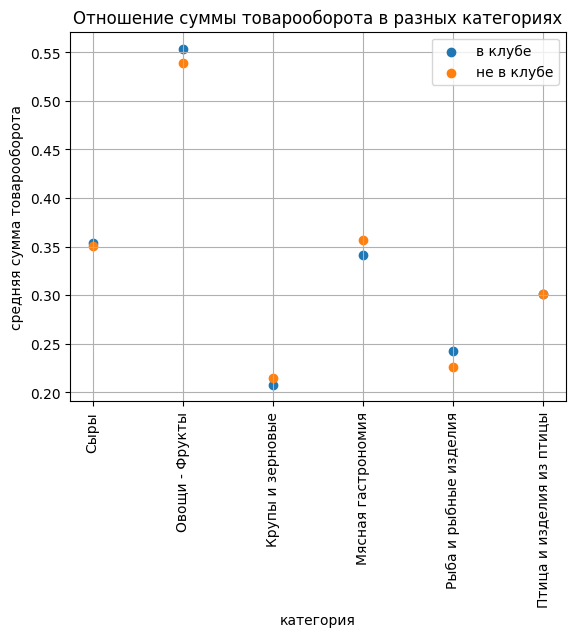

In [ ]:
plt.scatter(cats, [df[df.is_in_club == 1][f'mean_checks_cnt_ratio_{cat}'].mean() for cat in cats], label='в клубе')
plt.scatter(cats, [df[df.is_in_club == 0][f'mean_checks_cnt_ratio_{cat}'].mean() for cat in cats], label='не в клубе')
plt.legend()
plt.xlabel('категория')
plt.ylabel('средняя сумма товарооборота')
plt.grid(True)
plt.title('Отношение суммы товарооборота в разных категориях')
plt.xticks(rotation=90)
plt.show()


In [ ]:
ratio_df = pd.DataFrame(columns=cats, index=['in, %','out, %'],
             data=[[np.round(df[df.is_in_club == 1][f'mean_checks_cnt_ratio_{cat}'].mean() * 100, 1) for cat in cats],
                    [np.round(df[df.is_in_club == 0][f'mean_checks_cnt_ratio_{cat}'].mean() * 100, 1) for cat in cats]
                   ]).T 
ratio_df = ratio_df.round(2)
ratio_df = ratio_df.style.set_caption('Доля чеков в определённой категории')
ratio_df = ratio_df.format('{:.1f}')  
ratio_df

,"in, %","out, %"
Сыры,35.3,35.1
Овощи - Фрукты,55.4,53.9
Крупы и зерновые,20.8,21.5
Мясная гастрономия,34.1,35.7
Рыба и рыбные изделия,24.3,22.6
Птица и изделия из птицы,30.1,30.1
